In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

%store -r df
%matplotlib inline

### Network analysis and visualization

In this part, we will be analyzing basic characteristics of the same Wikipedia network used in Sentiment Analysis.

#### 1. Preparing an edgefile for importing
First, we'll map the node names to integer values. For data values, we'll use the VOT column value

In [12]:
# Adding Edge Attributes to DataFrame to depict colors (Red - Negative vote or result | Green - Positive vote or Result)
df.loc[df['VOT'] == '0', 'color_VOT'] = 'r'
df.loc[df['VOT'] == '1', 'color_VOT'] = 'g'

df.loc[df['RES'] == '-1', 'color_RES'] = 'r'
df.loc[df['RES'] == '1', 'color_RES'] = 'g'

In [13]:
# Converting DataFrame to a Directional Graph object
g = nx.from_pandas_dataframe(df, 'SRC', 'TGT', edge_attr='color_VOT', create_using=nx.DiGraph())

# Mapping node names to integer values
g2 = nx.convert_node_labels_to_integers(g)

# Writing an edgelist
nx.write_edgelist(g2, "Wiki.edgelist")

#### 2. Now loading the data as a graph object called 'Gwik'

In [14]:
Gwik = nx.read_edgelist("Wiki.edgelist")

#### 3. Printing the number of nodes and edges in the graph object

In [ ]:
print "Number of Edges: {}".format(Gwik.number_of_edges())
print "Number of Nodes: {}".format(Gwik.number_of_nodes())

#### 4. Computing the degree, betweneess and closeness centrality measures for the graph

In [ ]:
print "Degree Centrality: {}".format(list(nx.degree_centrality(Gwik).values())[0:5])
print "Betweenness Centrality: {}".format(list(nx.betweenness_centrality(Gwik).values())[0:5])
print "Closeness Centrality: {}".format(list(nx.closeness_centrality(Gwik).values())[0:5])

1\. The Degree Centrality tends to be higher for the "important" nodes which have many nodes connected to them. The Degree Centrality values appear meaningful as the values are very close to 0 which is reasonable in this dataset where the nodes are not that densely connected and there are very few "important" nodes with multiple edges connected to them.

2\. Betweennes Centrality is the measure of how often a node appears in the shortest path between randomly chosen vertices. The values are either 0 or very close to 0 which implies that most nodes are stand-alone nodes or don't have any connection other than the one which is making them stay in the network. 

3\. Closeness centrality is the average length of shortest distance between a node and all other nodes in the graph. A value of 0.2 - 0.3 obtained from top 5 nodes further implies that the network is not densely connected and has same Closeness Centrality for all the nodes where most of the shortest-paths may have been obtained by direct connection of nodes. 

#### 5. Now visualizing the graph

In [ ]:
# Figure size
plt.figure(figsize=(14, 10))

# Collecting edge data for coloring from 'color_VOT' attribute of Gwik graph object
edges = Gwik.edges()
colors_VOT = [Gwik[u][v]['color_VOT'] for u,v in edges]

# Plotting the network
nx.draw_networkx(Gwik, node_color='k', with_labels=False, node_size=50, arrows=True, edge_color=colors_VOT)

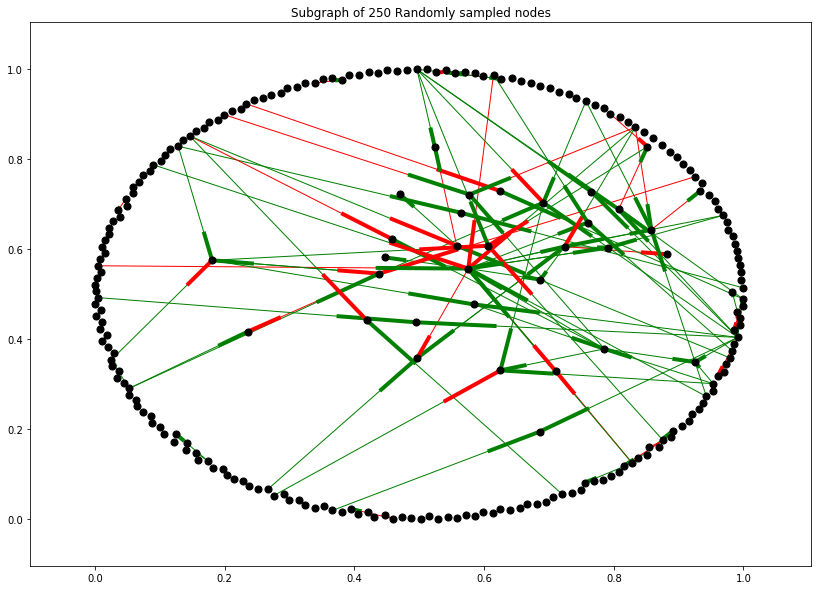

In [16]:
### Plotting Subgraph of 250 Random samples to clearly view the network

plt.figure(figsize=(14, 10))

# Generating 250 random integers and creating a subgraph based on those integers
small_list = list(np.random.randint(0, len(Gwik.nodes()), size = 250))
Hwik = g2.subgraph(small_list)

# Collecting edge data for coloring from 'color_VOT' attribute of Gwik graph object
edges = Hwik.edges()
colors_VOT = [Hwik[u][v]['color_VOT'] for u,v in edges]

# Plotting the network
nx.draw_networkx(Hwik, node_color='k', with_labels=False, node_size=50, arrows=True, edge_color=colors_VOT)
plt.title("Subgraph of 250 Randomly sampled nodes")

<p>
<span style="color:blue">
The vote values are represented by the edges - red colored edge represents a negative vote and green colored edge represents a positive vote. The width of the edge appears more at one end - this depicts the direction of the vote i.e. direction from Voter to Votee (the person who requested for Adminship). Therefore, the receiver of the votes has multiple edges connected which shows that he received votes from multiple people. 
</span>
</p>

#### 6. Now also adding in the resolution of the vote into the graph and a new visualization of the network

In [ ]:
# Converting DataFrame to a Directional Graph object
Gwik_res = nx.from_pandas_dataframe(df, 'SRC', 'TGT', edge_attr=['color_VOT','color_RES'], create_using=nx.DiGraph())

# Mapping node names to integer values
Gwik_res = nx.convert_node_labels_to_integers(Gwik_res)

# Setting the figure size
plt.figure(figsize=(24, 16))

# Collecting edge data for coloring from 'color_VOT' and 'color_RES' attributes of Gwik_res graph object
edges = Gwik_res.edges()
colors_VOT = [Gwik_res[u][v]['color_VOT'] for u,v in edges]
colors_RES = [Gwik_res[u][v]['color_RES'] for u,v in edges]

# Extracting a list of source and target node names from graph_object.edges()
target = []
source = []
for i in Gwik_res.edges():
    src, tgt = i
    target.append(tgt)
    source.append(src)

# Plot - Vote (VOT) vs Result (RES)
nx.draw_networkx(Gwik_res, nodelist = source, with_labels=False, node_color = 'k', edge_color=colors_VOT, node_size=50)

nx.draw_networkx(Gwik_res, nodelist = target, with_labels=False, node_color = colors_RES, edge_color=colors_VOT, node_size=100)

plt.title("Result (RES) vs Vote (VOT)", fontsize=20)
plt.legend()

/Users/harshitsrivastava/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


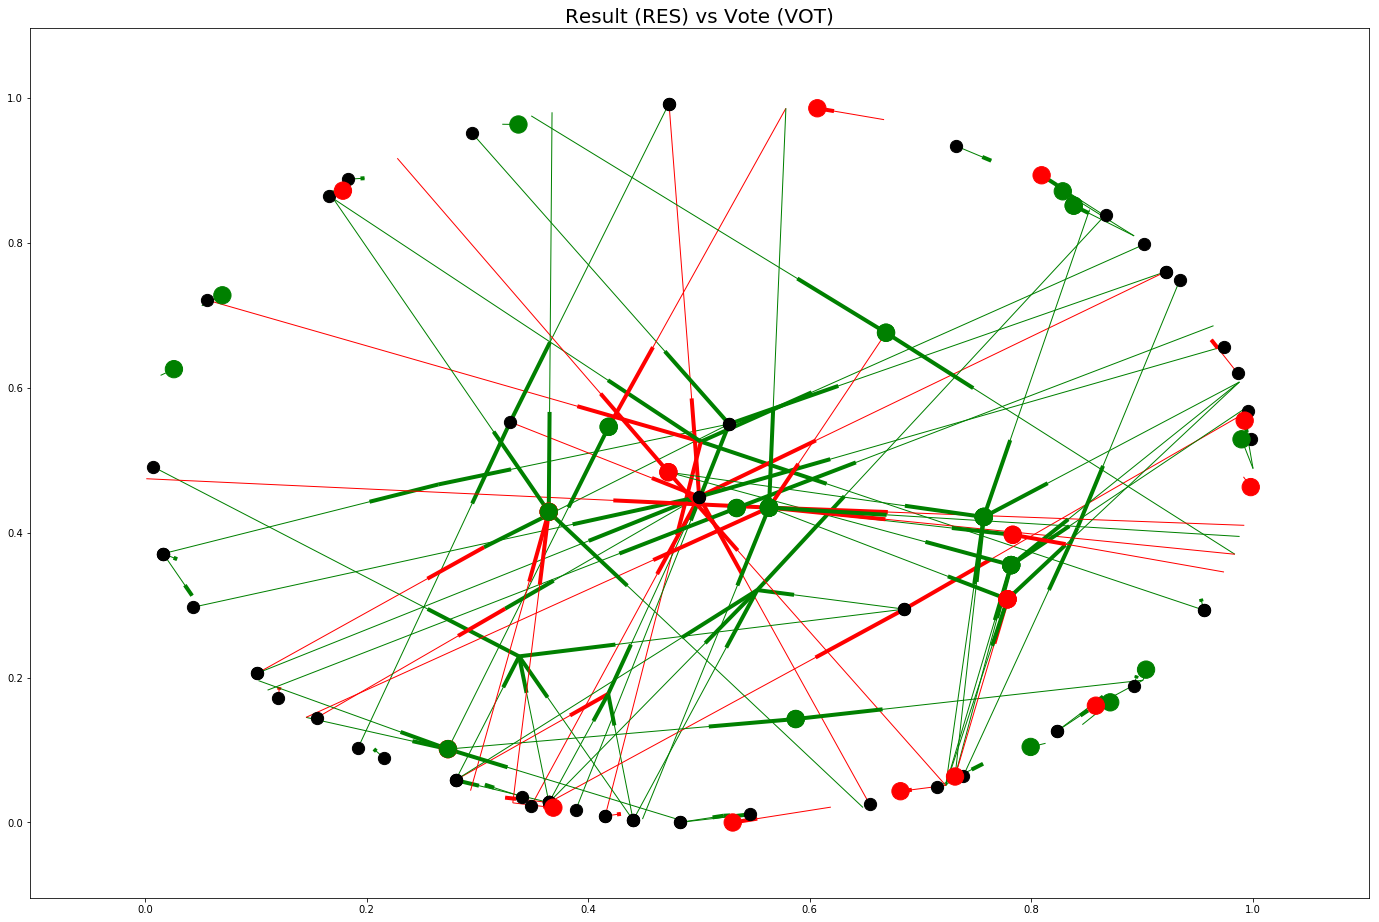

In [17]:
### Plotting subgraph of 250 random nodes for Vote (VOT) and Result (RES)

# Converting DataFrame to a Directional Graph object
Gwik_res = nx.from_pandas_dataframe(df, 'SRC', 'TGT', edge_attr=['color_VOT','color_RES'], create_using=nx.DiGraph())

# Mapping node names to integer values
Gwik_res = nx.convert_node_labels_to_integers(Gwik_res)

plt.figure(figsize=(24, 16))
plt.title("VOT vs RES")

# Generation of random integers
small_list = list(np.random.randint(0, len(Gwik_res.nodes()), size = 250))
# Creating subgraphs
Hwik_res = Gwik_res.subgraph(small_list)

# Collecting edge data for coloring from 'color_VOT' and 'color_RES' attributes of Gwik_res graph object
edges = Hwik_res.edges()
colors_VOT = [Hwik_res[u][v]['color_VOT'] for u,v in edges]
colors_RES = [Hwik_res[u][v]['color_RES'] for u,v in edges]

# Extracting a list of source and target node names from graph_object.edges()
target = []
source = []
for i in Hwik_res.edges():
    src, tgt = i
    target.append(tgt)
    source.append(src)

# Plotting the subgraph
nx.draw_networkx(Hwik_res, nodelist = source, with_labels=False, node_color = 'k', edge_color=colors_VOT, node_size=150)

nx.draw_networkx(Hwik_res, nodelist = target, with_labels=False, node_color = colors_RES, edge_color=colors_VOT, node_size=300)
plt.title("Result (RES) vs Vote (VOT)", fontsize=20)
plt.legend()

<p>
<span style="color:blue">
The original figure seems a bit too cluttered so the subgraph depicts a clearer picture. The figure represents the color of target nodes as 'red' or 'green' depending on the result they received (red for -ve and green for +ve). The edges from the source nodes represent the vote given by each member (again red for -ve and green for +ve). In this way, we can visualize the voting pattern by looking at the edges and visualize the final result by looking at the target nodes's color. We can clearly observe the voting pattern on some nodes - large number of negative votes leading to a negative result and vice-versa. However, the subgraph contains only a small number of nodes and may give an incomplete picture in some areas. 
</span>
</p>